In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_customers = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv')

In [ ]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall_customers.shape


(200, 5)

In [ ]:
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **EDA**

In [ ]:
mall_customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

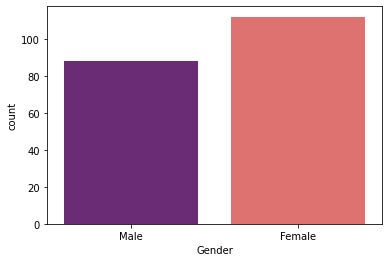

In [ ]:
sns.countplot(x = 'Gender',data = mall_customers ,palette='magma')

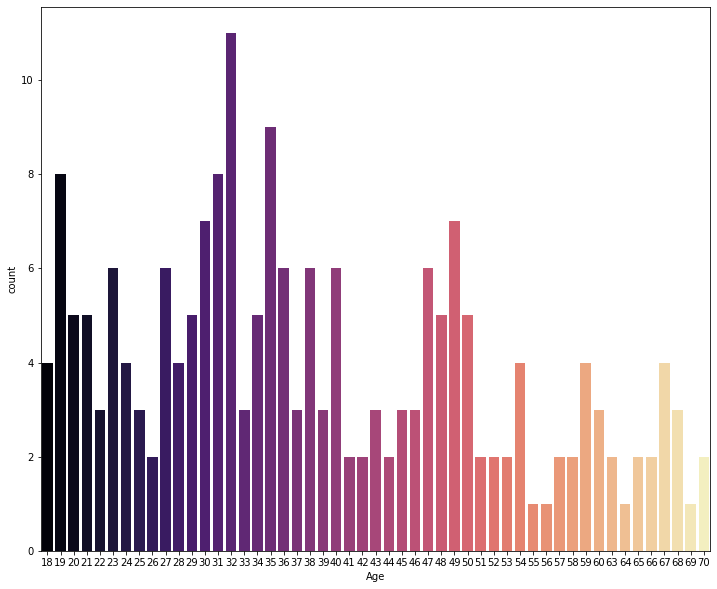

In [ ]:
#Frequency of each age
plt.figure(figsize = (12,10))
sns.countplot(x='Age' , data = mall_customers , palette ='magma')

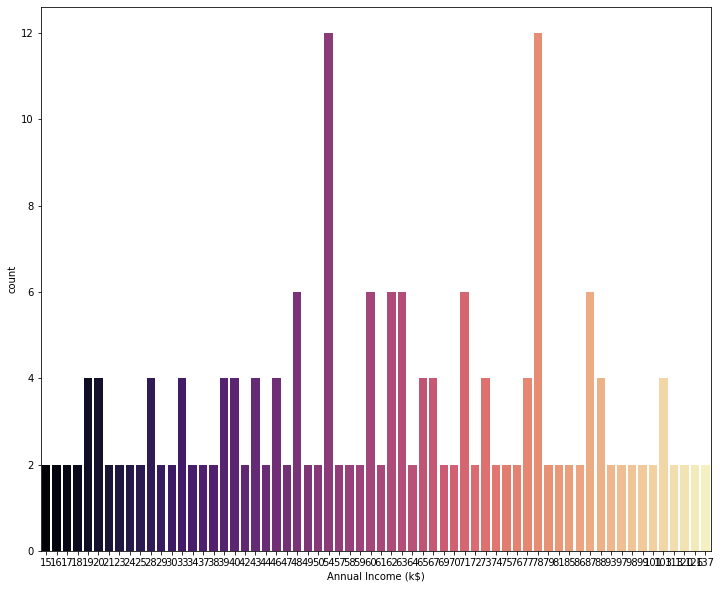

In [ ]:
#Frequency of each anual income
plt.figure(figsize = (12,10))
sns.countplot(x='Annual Income (k$)' , data = mall_customers , palette ='magma')

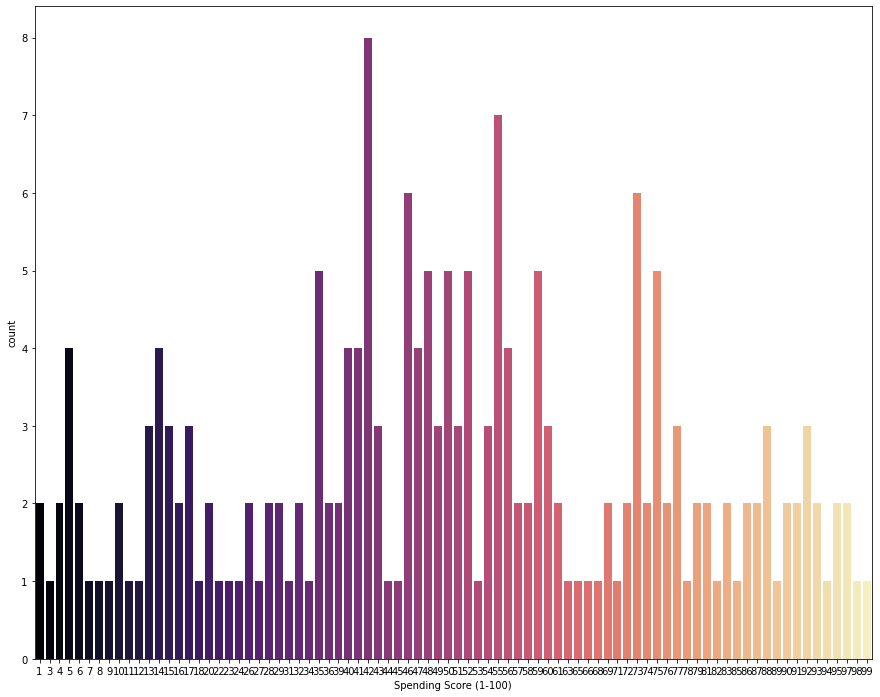

In [ ]:
plt.figure(figsize =(15,12))
sns.countplot(x='Spending Score (1-100)',data = mall_customers,palette = 'magma')

In [ ]:
x = mall_customers.iloc[:,[3,4]]

In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# **Elbow Method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Use elbow method to find optimum number of cluster ie. K
#n_cluster =K
wcss =[]
for i in range(1,16):              #1-16 is a random range
  kmeans =KMeans(n_clusters = i ,init ='k-means++',max_iter= 300 ,n_init =10,random_state=0)         #n_init:no. of times algo will with diff centroid
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543,
 17602.19046838677,
 16115.215606639838,
 14600.44364738564,
 13450.08023381847,
 12038.745689262341]

**Visualization of elbow method**

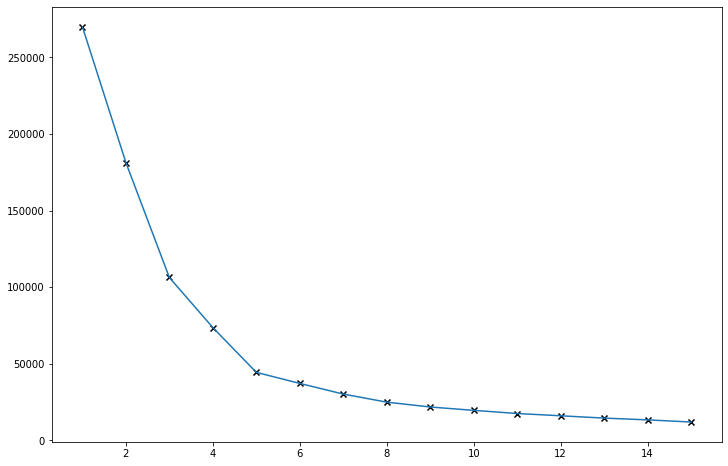

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, marker='x', color = 'black')
plt.show()


**K-Means K=5**

In [ ]:
kmeans =KMeans(n_clusters = 5 ,init ='k-means++',max_iter= 300 ,n_init =10,random_state=0)


In [ ]:
y_clusters =kmeans.fit_predict(x)

In [ ]:
y_clusters

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
#wcss value
kmeans.inertia_

44448.45544793371

In [ ]:
y_clusters.astype



<function ndarray.astype>

In [ ]:
x_array =np.array(x)

In [ ]:
x_array.astype

<function ndarray.astype>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


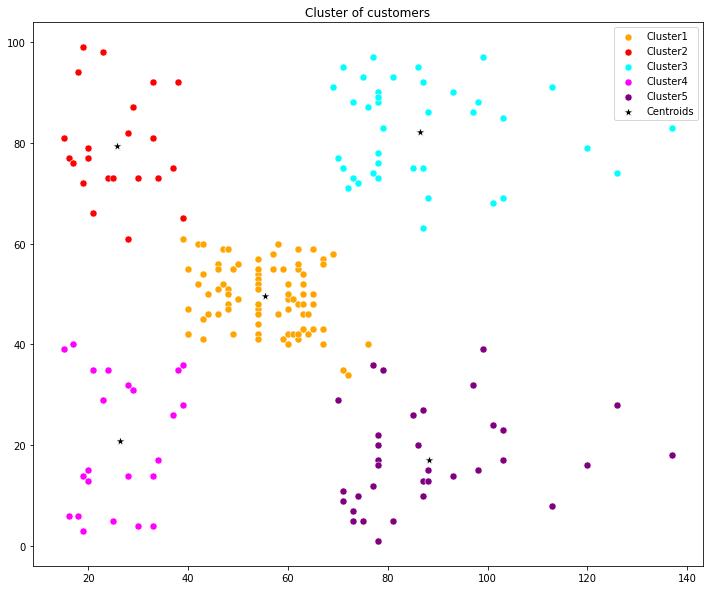

In [ ]:
#visualization of cluster
plt.figure(figsize =(12,10))
sns.scatterplot(x =x_array[y_clusters ==0 ,0], y =  x_array [y_clusters == 0, 1],color ='orange',label ='Cluster1',s = 50)
sns.scatterplot(x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], color='red', label = 'Cluster2', s = 50)
sns.scatterplot(x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], color='cyan', label = 'Cluster3', s = 50)
sns.scatterplot(x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], color='magenta', label = 'Cluster4', s = 50)
sns.scatterplot(x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], color='purple', label = 'Cluster5', s = 50)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,marker ='*',color='black',label ='Centroids',s =100)
plt.title("Cluster of customers")
#plt.xlabel("Annual Income (k$)")
#plt.ylabel("Spending Score (1-100)")
plt.show()

# **Hierarchical Clustering**
Dendogram :Choose no. of clusters

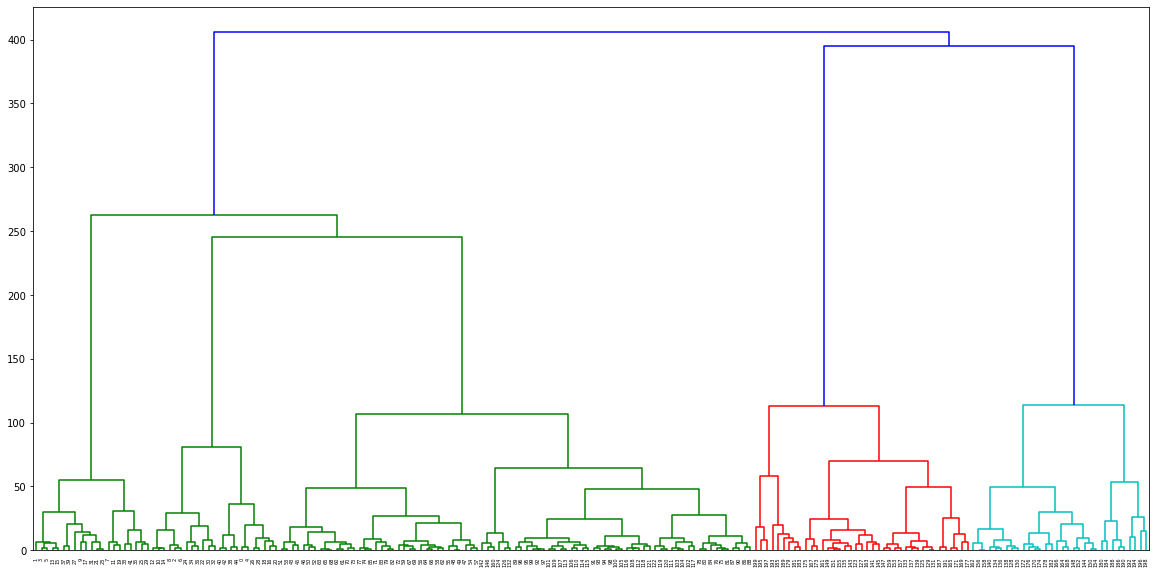

In [ ]:
import scipy.cluster.hierarchy as sch
# visualization of Dendrogram
fig = plt.figure(figsize=(20,10))
# Total distance from centrods = 'ward'
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')


In [ ]:
y_hc = hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])